In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

/home/hongb/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
### Input .bed file is need
bed = pd.read_csv('../Data/Reference/Araport11_gene_protein_coding.1-genes.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'geneid', 'blank', 'strand'])
AtStrandDic = dict() ; AtLengthDic = dict()
with open('../Data/Reference/Araport11_gene_protein_coding.1-genes.bed') as b1:
    for line in b1:
        chr_name, start, end, geneid, _, strand = line.rstrip().split('\t')
        AtStrandDic[geneid] = strand
        AtLengthDic[geneid] = int(end) - int(start)

######## Pile-up analysis with flipping images of (-)-stranded genes
def PileUpArray(imgdic, size, genelist, StrandDic, LengthDic, lcut):
    S = np.zeros((size, size))
    n=0
    for g in genelist:

        if LengthDic[g] >= lcut and g in imgdic:
            if StrandDic[g] == "+":
                S = S + np.array(imgdic[g])
            else:
                S = S + np.array(np.flip(imgdic[g]))
            n+=1
    return S/n

######## Pile-up analysis with raw images
def PileUpArray2(imgdic, size, genes):
    S = np.zeros((size, size))
    n=0
    for g in genes:
        if g in imgdic:
            S = S + np.array(imgdic[g])
            n+=1
    return S/n

In [10]:
## Revise here for test your piled-up pickle file
in_pickle = '../Data/pileup/CT.oe.SCALE.250bp.p0.5.pickle'

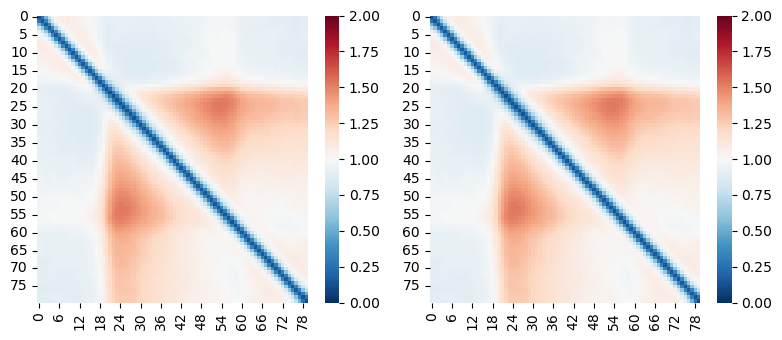

In [11]:
with open(in_pickle, 'rb') as pk1:
    test_pickle = pickle.load(pk1)

fig, axes = plt.subplots(1,2, figsize = (8,3.5))
test_pileup1 = PileUpArray(test_pickle, 80, test_pickle.keys(), AtStrandDic, AtLengthDic, 1000)
test_pileup2 = PileUpArray2(test_pickle, 80, test_pickle.keys())

sns.heatmap(test_pileup1, vmax=2.0, vmin=0, cmap='RdBu_r', ax=axes[0])
sns.heatmap(test_pileup1, vmax=2.0, vmin=0, cmap='RdBu_r', ax=axes[1])
plt.tight_layout()